## **1.Implement Filtering in the Frequency Domain**



In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

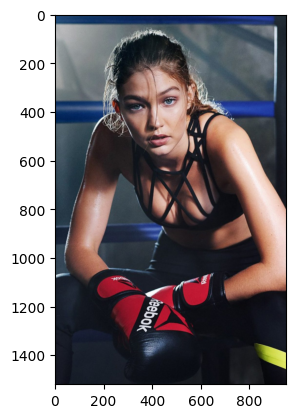

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('pic.jpg')
imgplot = plt.imshow(img)
plt.show()

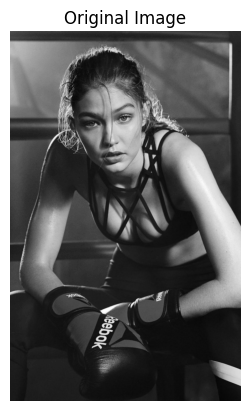

In [ ]:
# Load the image
image = cv2.imread('pic.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

a. Use the Fast Fourier Transform (FFT) to convert an image from the
spatial domain to the frequency domain.


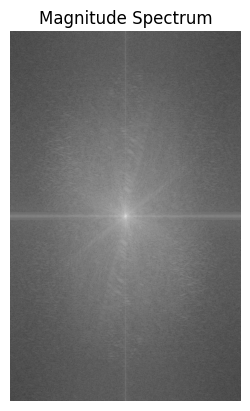

In [ ]:
# Perform FFT
f_transform = np.fft.fft2(image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Get the magnitude spectrum
magnitude_spectrum = np.log(np.abs(f_transform_shifted) + 1)

# Display the magnitude spectrum
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')
plt.show()

b. Apply a low-pass filter to remove high-frequency components
(smoothing).


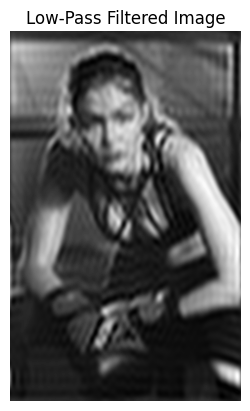

In [ ]:
def low_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1
    return mask

# Create and apply low-pass filter
lp_filter = low_pass_filter(image.shape, 30)
filtered_lp = f_transform_shifted * lp_filter

# Inverse FFT to get the filtered image
img_lp = np.fft.ifft2(np.fft.ifftshift(filtered_lp))
img_lp = np.abs(img_lp)

# Display the low-pass filtered image
plt.imshow(img_lp, cmap='gray')
plt.title('Low-Pass Filtered Image')
plt.axis('off')
plt.show()

c. Apply a high-pass filter to enhance edges (sharpening).


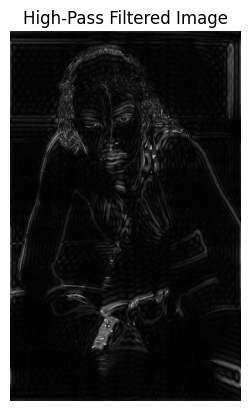

In [ ]:
def high_pass_filter(shape, cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.ones((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0
    return mask

# Create and apply high-pass filter
hp_filter = high_pass_filter(image.shape, 30)
filtered_hp = f_transform_shifted * hp_filter

# Inverse FFT to get the filtered image
img_hp = np.fft.ifft2(np.fft.ifftshift(filtered_hp))
img_hp = np.abs(img_hp)

# Display the high-pass filtered image
plt.imshow(img_hp, cmap='gray')
plt.title('High-Pass Filtered Image')
plt.axis('off')
plt.show()


d. Convert the filtered image back to the spatial domain using the
inverse FFT.

e. Design a custom frequency domain filter that combines properties of
both low-pass and high-pass filters (e.g., band-pass filter).


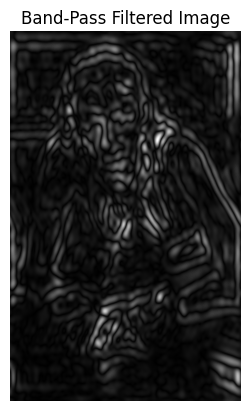

In [ ]:
def band_pass_filter(shape, low_cutoff, high_cutoff):
    rows, cols = shape
    crow, ccol = rows // 2, cols // 2
    mask = np.zeros((rows, cols), np.uint8)
    mask[crow - high_cutoff:crow + high_cutoff, ccol - high_cutoff:ccol + high_cutoff] = 1
    mask[crow - low_cutoff:crow + low_cutoff, ccol - low_cutoff:ccol + low_cutoff] = 0
    return mask

# Create and apply band-pass filter
bp_filter = band_pass_filter(image.shape, 10, 30)
filtered_bp = f_transform_shifted * bp_filter

# Inverse FFT to get the filtered image
img_bp = np.fft.ifft2(np.fft.ifftshift(filtered_bp))
img_bp = np.abs(img_bp)

# Display the band-pass filtered image
plt.imshow(img_bp, cmap='gray')
plt.title('Band-Pass Filtered Image')
plt.axis('off')
plt.show()

### ***2. Walsh and Hadamard transform***



**Task 1: Implement Walsh Transform**

● Apply the Walsh Transform to a given image.

● Visualize the Walsh spectrum.

● Submit: Your code and the output images.


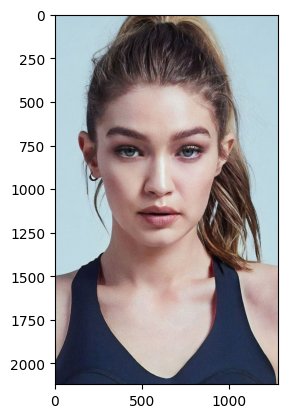

In [ ]:
# Load the image
image_path = 'pic2.jpg'  # Make sure this image is in the same directory as your notebook
image = cv2.imread(image_path)
img = mpimg.imread('pic2.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
def hadamard_matrix(n):
    """Generate Hadamard matrix of order n."""
    if n == 1:
        return np.array([[1]])
    else:
        H = hadamard_matrix(n // 2)
        return np.block([[H, H], [H, -H]])

In [ ]:
def walsh_transform(image):
    """Apply Walsh Transform to the image."""
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the size of the image
    rows, cols = gray_image.shape

    # Ensure the dimensions are powers of 2
    n = 1
    while n < max(rows, cols):
        n *= 2
    padded_image = np.zeros((n, n))
    padded_image[:rows, :cols] = gray_image

    # Create Hadamard matrix of size n
    H = hadamard_matrix(n)

    # Apply the Walsh Transform
    transformed_image = H @ padded_image @ H

    return transformed_image

In [ ]:
def visualize_walsh_spectrum(transformed_image):
    """Visualize the Walsh spectrum."""
    plt.figure(figsize=(10, 10))
    plt.imshow(np.abs(transformed_image), cmap='gray')
    plt.title('Walsh Spectrum')
    plt.colorbar()
    plt.axis('off')
    plt.show()

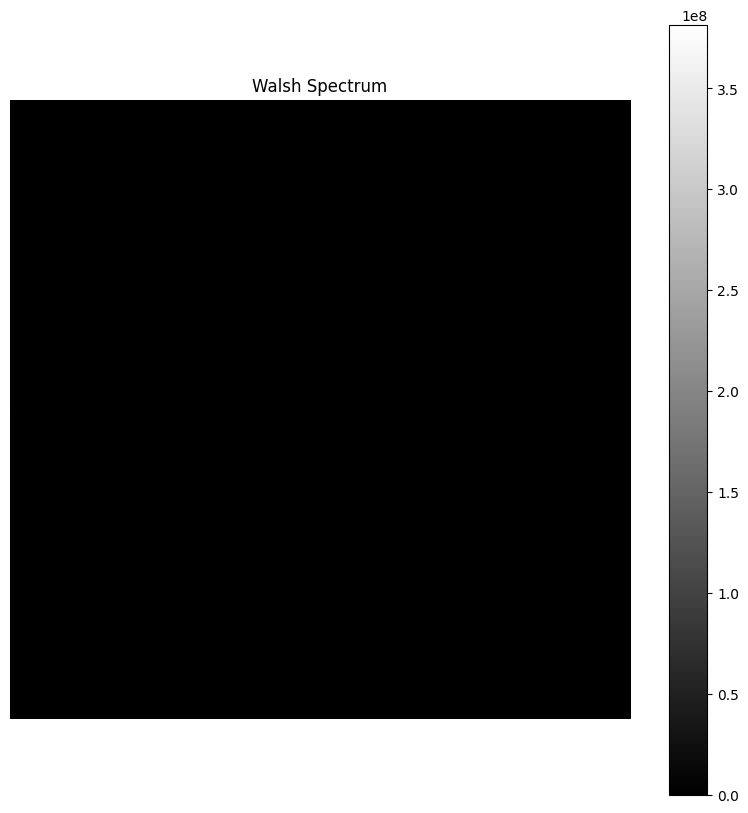

In [ ]:
# Apply Walsh Transform
transformed_image = walsh_transform(image)

# Visualize the Walsh spectrum
visualize_walsh_spectrum(transformed_image)

**Task 2: Implement Hadamard Transform**

● Apply the Hadamard Transform to the same image.

● Visualize the Hadamard spectrum.

In [ ]:
def hadamard_transform(image):
    """Apply Hadamard Transform to the image."""
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Get the size of the image
    rows, cols = gray_image.shape

    # Ensure the dimensions are powers of 2
    n = 1
    while n < max(rows, cols):
        n *= 2
    padded_image = np.zeros((n, n))
    padded_image[:rows, :cols] = gray_image

    # Create Hadamard matrix of size n
    H = hadamard_matrix(n)

    # Apply the Hadamard Transform
    transformed_image = H @ padded_image @ H

    return transformed_image

In [ ]:
def visualize_hadamard_spectrum(transformed_image):
    """Visualize the Hadamard spectrum."""
    plt.figure(figsize=(10, 10))
    plt.imshow(np.abs(transformed_image), cmap='gray')
    plt.title('Hadamard Spectrum')
    plt.colorbar()
    plt.axis('off')
    plt.show()

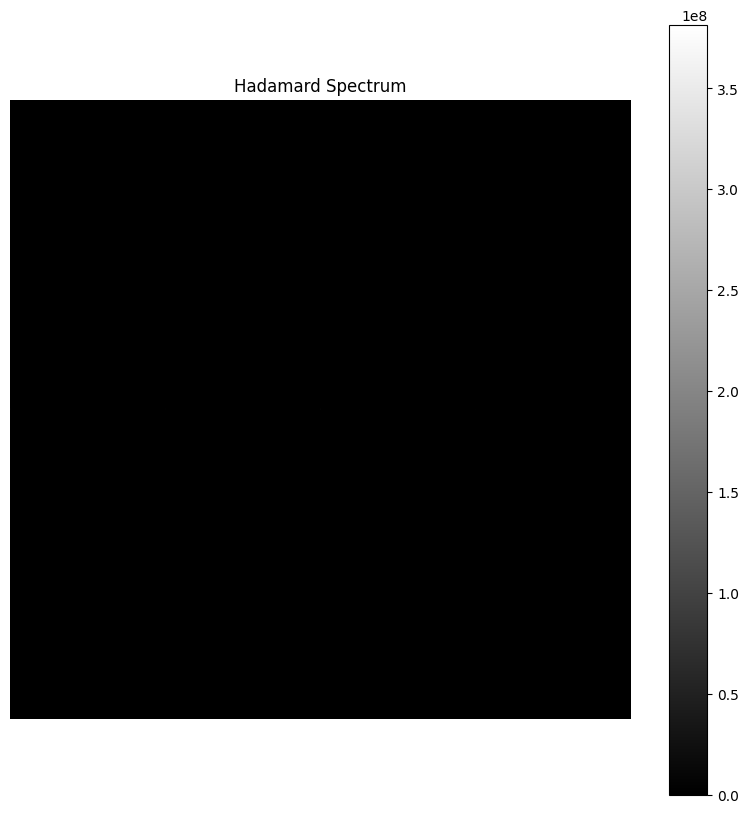

In [ ]:
# Apply Hadamard Transform
transformed_image = hadamard_transform(image)

# Visualize the Hadamard spectrum
visualize_hadamard_spectrum(transformed_image)

## **3. Discrete Cosine Transform (DCT)**

a. Apply the 2D DCT to an image and visualize the DCT coefficients.

b. Implement an image compression algorithm based on DCT by
retaining only a subset of the largest DCT coefficients (e.g., top 10%,
50%, etc.).

c. Reconstruct the image using the retained coefficients.

d. Submit: Your code and the images of both the DCT coefficients and
the reconstructed images for different compression ratios.

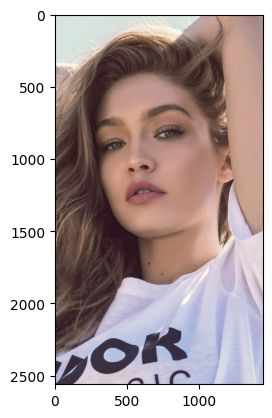

In [ ]:
# Load the image
image_path = 'image3.jpg'
image = cv2.imread(image_path)
img = mpimg.imread('image3.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct
image_path = 'image3.jpg'
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

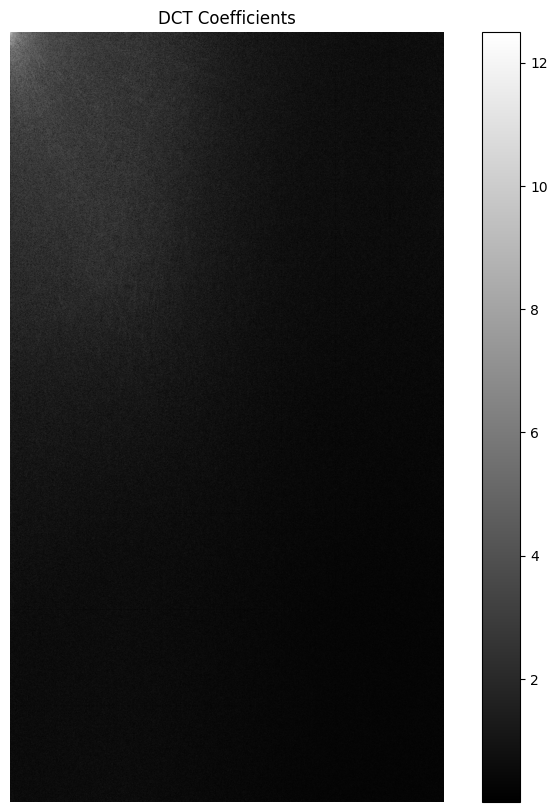

In [ ]:
def apply_dct(image):
    """Apply 2D DCT to the image."""
    dct_image = dct(dct(image.T, norm='ortho').T, norm='ortho')
    return dct_image

def visualize_dct(dct_image):
    """Visualize the DCT coefficients."""
    plt.figure(figsize=(10, 10))
    plt.imshow(np.log(np.abs(dct_image) + 1), cmap='gray')
    plt.title('DCT Coefficients')
    plt.colorbar()
    plt.axis('off')
    plt.show()

# Apply DCT
dct_image = apply_dct(gray_image)

# Visualize DCT coefficients
visualize_dct(dct_image)

In [ ]:
def compress_image(dct_image, compression_ratio):
    """Compress the image by retaining a subset of the largest DCT coefficients."""
    # Get the number of coefficients to keep
    num_coefficients = int(np.prod(dct_image.shape) * compression_ratio)

    # Flatten the DCT coefficients and get the indices of the largest ones
    flat_dct = np.abs(dct_image).flatten()
    indices = np.argsort(flat_dct)[-num_coefficients:]

    # Create a mask to retain only the largest coefficients
    mask = np.zeros_like(flat_dct)
    mask[indices] = flat_dct[indices]

    # Reshape the mask back to the original DCT shape
    compressed_dct = mask.reshape(dct_image.shape)
    return compressed_dct

In [ ]:
def reconstruct_image(compressed_dct):
    """Reconstruct the image from the compressed DCT coefficients."""
    reconstructed_image = idct(idct(compressed_dct.T, norm='ortho').T, norm='ortho')
    return np.clip(reconstructed_image, 0, 255).astype(np.uint8)

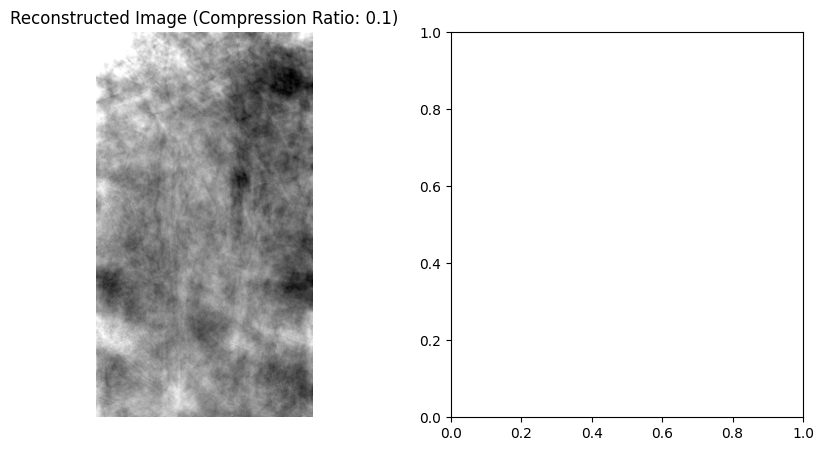

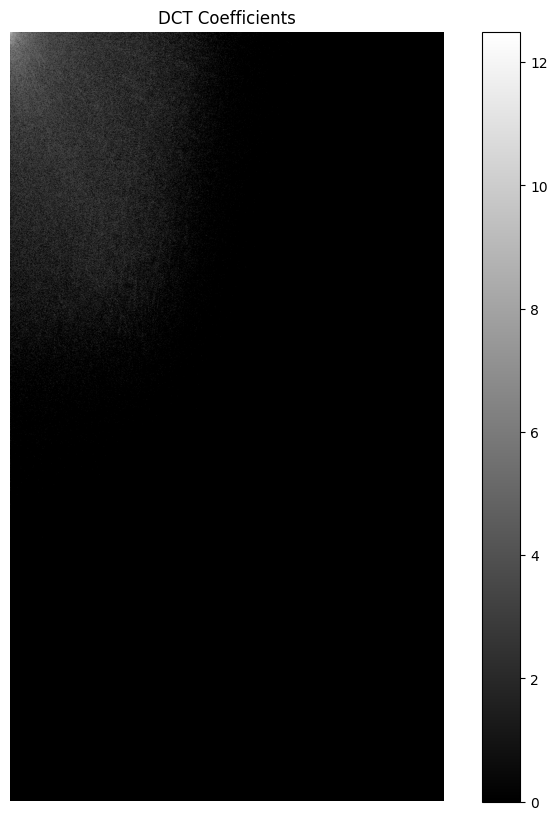

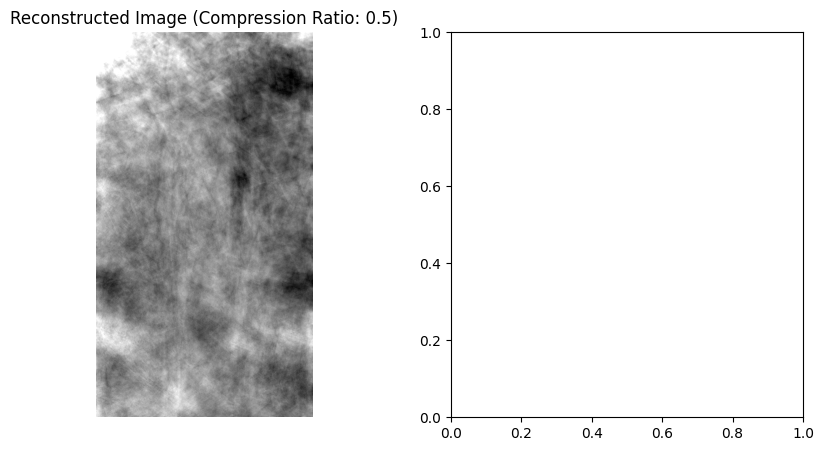

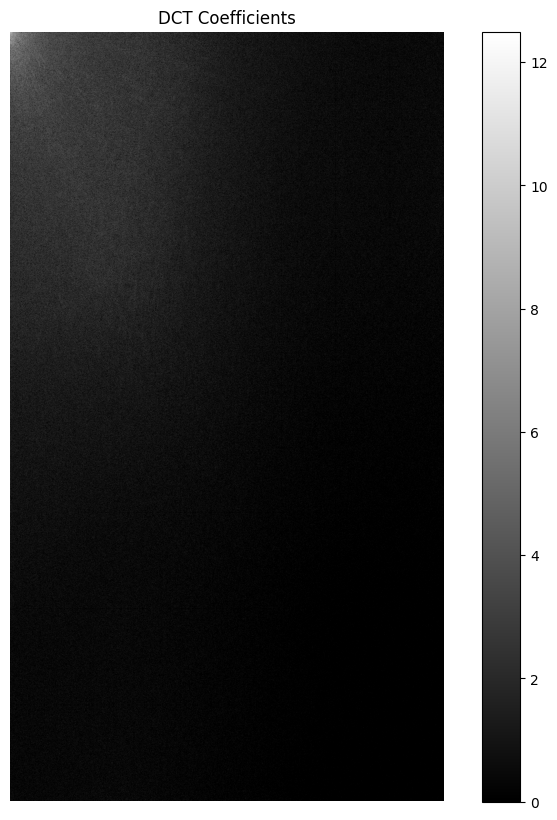

In [ ]:
# Define compression ratios
compression_ratios = [0.1, 0.5]  # 10% and 50%

for ratio in compression_ratios:
    # Compress the image
    compressed_dct = compress_image(dct_image, ratio)

    # Reconstruct the image
    reconstructed_image = reconstruct_image(compressed_dct)

    # Visualize the reconstructed image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title(f'Reconstructed Image (Compression Ratio: {ratio})')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    visualize_dct(compressed_dct)

## **4. Discrete Wavelet Transform (DWT)**

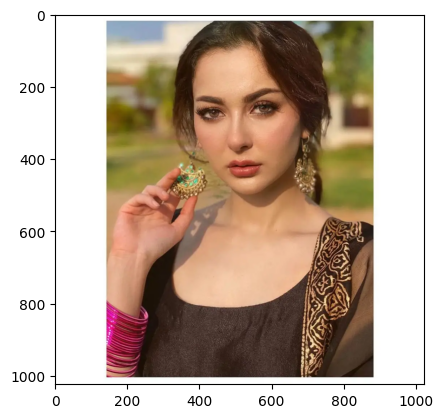

In [ ]:
image_path = 'image4.webp'  # Make sure this image is in the same directory as your notebook
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
img = mpimg.imread('image4.webp')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 28.0 MB/s eta 0:00:00


In [ ]:
import pywt
def apply_2d_dwt(image):
    """Apply 2D Discrete Wavelet Transform (DWT) to the image."""
    coeffs2 = pywt.dwt2(image, 'haar')  # Using Haar wavelet
    return coeffs2

# Apply 2D DWT
coeffs2 = apply_2d_dwt(image)

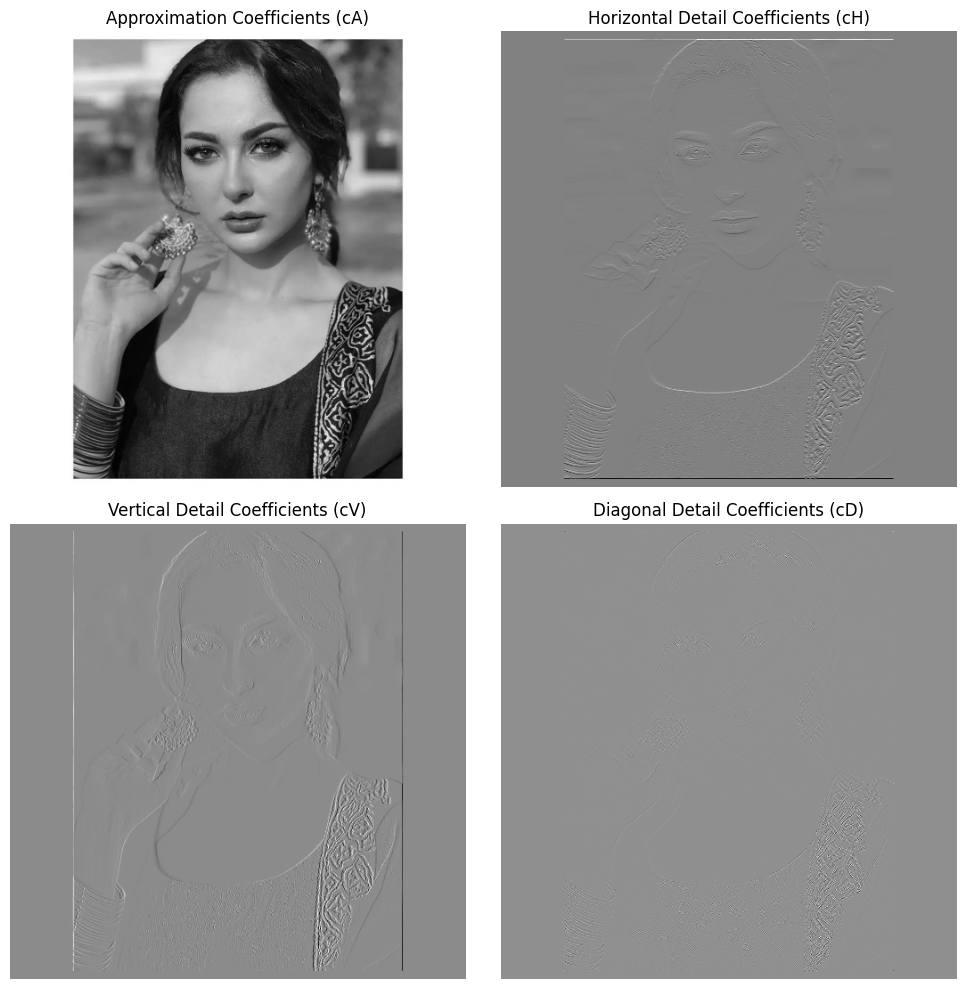

In [ ]:
def visualize_wavelet_decomposition(coeffs2):
    """Visualize the wavelet decomposition (approximation and detail coefficients)."""
    cA, (cH, cV, cD) = coeffs2  # Unpack coefficients

    plt.figure(figsize=(10,10))

    # Approximation coefficients
    plt.subplot(2, 2, 1)
    plt.imshow(cA, cmap='gray')
    plt.title('Approximation Coefficients (cA)')
    plt.axis('off')

    # Horizontal detail coefficients
    plt.subplot(2, 2, 2)
    plt.imshow(cH, cmap='gray')
    plt.title('Horizontal Detail Coefficients (cH)')
    plt.axis('off')

    # Vertical detail coefficients
    plt.subplot(2, 2, 3)
    plt.imshow(cV, cmap='gray')
    plt.title('Vertical Detail Coefficients (cV)')
    plt.axis('off')

    # Diagonal detail coefficients
    plt.subplot(2, 2, 4)
    plt.imshow(cD, cmap='gray')
    plt.title('Diagonal Detail Coefficients (cD)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualize wavelet decomposition
visualize_wavelet_decomposition(coeffs2)

**Task 2: Reconstruct Image using DWT**

● Reconstruct the original image from its wavelet coefficients.

● Experiment with reconstructing the image by selectively retaining
approximation coefficients at different levels.


In [ ]:
def apply_2d_dwt(image):
    """Apply 2D Discrete Wavelet Transform (DWT) to the image."""
    coeffs2 = pywt.dwt2(image, 'haar')  # Using Haar wavelet
    return coeffs2

# Apply 2D DWT
coeffs2 = apply_2d_dwt(image)

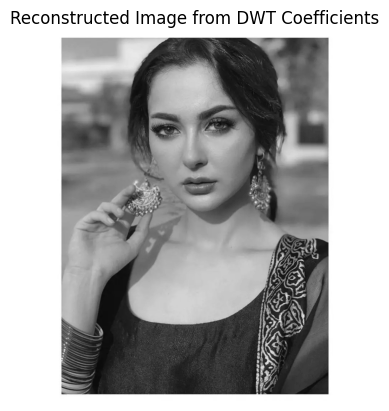

In [67]:
def reconstruct_image(coeffs2):
    """Reconstruct the image from wavelet coefficients."""
    return pywt.idwt2(coeffs2, 'haar')
reconstructed_image = reconstruct_image(coeffs2)
plt.imshow(reconstructed_image, cmap='gray')
plt.title('Reconstructed Image from DWT Coefficients')
plt.axis('off')
plt.show()

In [68]:
pip



Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [69]:
pi

NameError: name 'pi' is not defined

In [70]:
pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c

In [71]:
install

NameError: name 'install' is not defined

In [72]:
pip


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  inspect                     Inspect the python environment.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  index                       Inspect information available from package indexes.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper c